In [34]:
import psycopg2
from psycopg2.extensions import connection

In [35]:
from dotenv import load_dotenv
import os
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [36]:
conn = psycopg2.connect(f"dbname={DB_NAME} user={DB_USER} password={DB_PASSWORD} host=localhost")

In [37]:
table = "social_network"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [38]:
# Create a dataframe

import pandas as pd
df = pd.DataFrame(raw_data, columns=column_names)
df.head()

,id,compose_post_service_cpu,compose_post_service_memory,compose_post_service_replicas,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_redis_replicas,home_timeline_service_cpu,home_timeline_service_memory,home_timeline_service_replicas,...,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_mongodb_replicas,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_redis_replicas,user_timeline_service_cpu,user_timeline_service_memory,user_timeline_service_replicas,timestamp
0,1,0.00175,7.335938,1,1.88845,369.058594,1,0.00320,7.636719,1,...,3.07145,169.289062,1,2.3149,10.074219,1,0.00985,24.789062,1,1720343114
1,2,0.00225,7.335938,1,1.87315,369.058594,1,0.00305,7.636719,1,...,3.07145,169.289062,1,2.0376,10.324219,1,0.02380,24.789062,1,1720343124
2,3,0.00375,7.335938,1,3.25015,369.308594,1,0.00470,7.636719,1,...,4.08245,169.304688,1,3.4165,10.074219,1,0.02380,24.789062,1,1720343134
3,4,0.00150,7.335938,1,1.37700,369.308594,1,0.00165,7.636719,1,...,7.17575,169.304688,1,3.4199,10.074219,1,0.02390,24.789062,1,1720343144
4,5,0.00290,7.335938,1,1.52625,369.308594,1,0.00140,7.636719,1,...,3.09330,169.304688,1,2.0410,10.074219,1,0.02390,24.789062,1,1720343154


In [39]:
table = "social_network_predicted"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [40]:
# Create a dataframe

import pandas as pd
df_predicted = pd.DataFrame(raw_predicted_data, columns=column_names)
df_predicted.head()

,id,compose_post_service_cpu,compose_post_service_memory,compose_post_service_replicas,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_redis_replicas,home_timeline_service_cpu,home_timeline_service_memory,home_timeline_service_replicas,...,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_mongodb_replicas,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_redis_replicas,user_timeline_service_cpu,user_timeline_service_memory,user_timeline_service_replicas,timestamp
0,1,0.000000,11.979299,None,62.406467,313.24530,None,0.000000,8.857627,None,...,0.0,179.96107,None,0.0,17.934803,None,21.927258,26.007998,None,1720343314
1,2,2.403749,11.810098,None,60.320656,338.17798,None,0.000000,9.026725,None,...,0.0,193.33340,None,0.0,18.878850,None,20.879534,21.926450,None,1720343324
2,3,0.000000,12.571133,None,61.770490,358.21880,None,0.409045,9.170280,None,...,0.0,192.07413,None,0.0,22.199053,None,35.261585,29.742252,None,1720343334
3,4,1.910162,11.744896,None,58.786858,328.31910,None,0.000000,9.033395,None,...,0.0,177.83876,None,0.0,18.708366,None,37.350204,25.832602,None,1720343344
4,5,0.000000,11.745255,None,60.252170,305.41113,None,0.000000,8.446522,None,...,0.0,174.63223,None,0.0,16.119987,None,25.892550,23.969362,None,1720343354


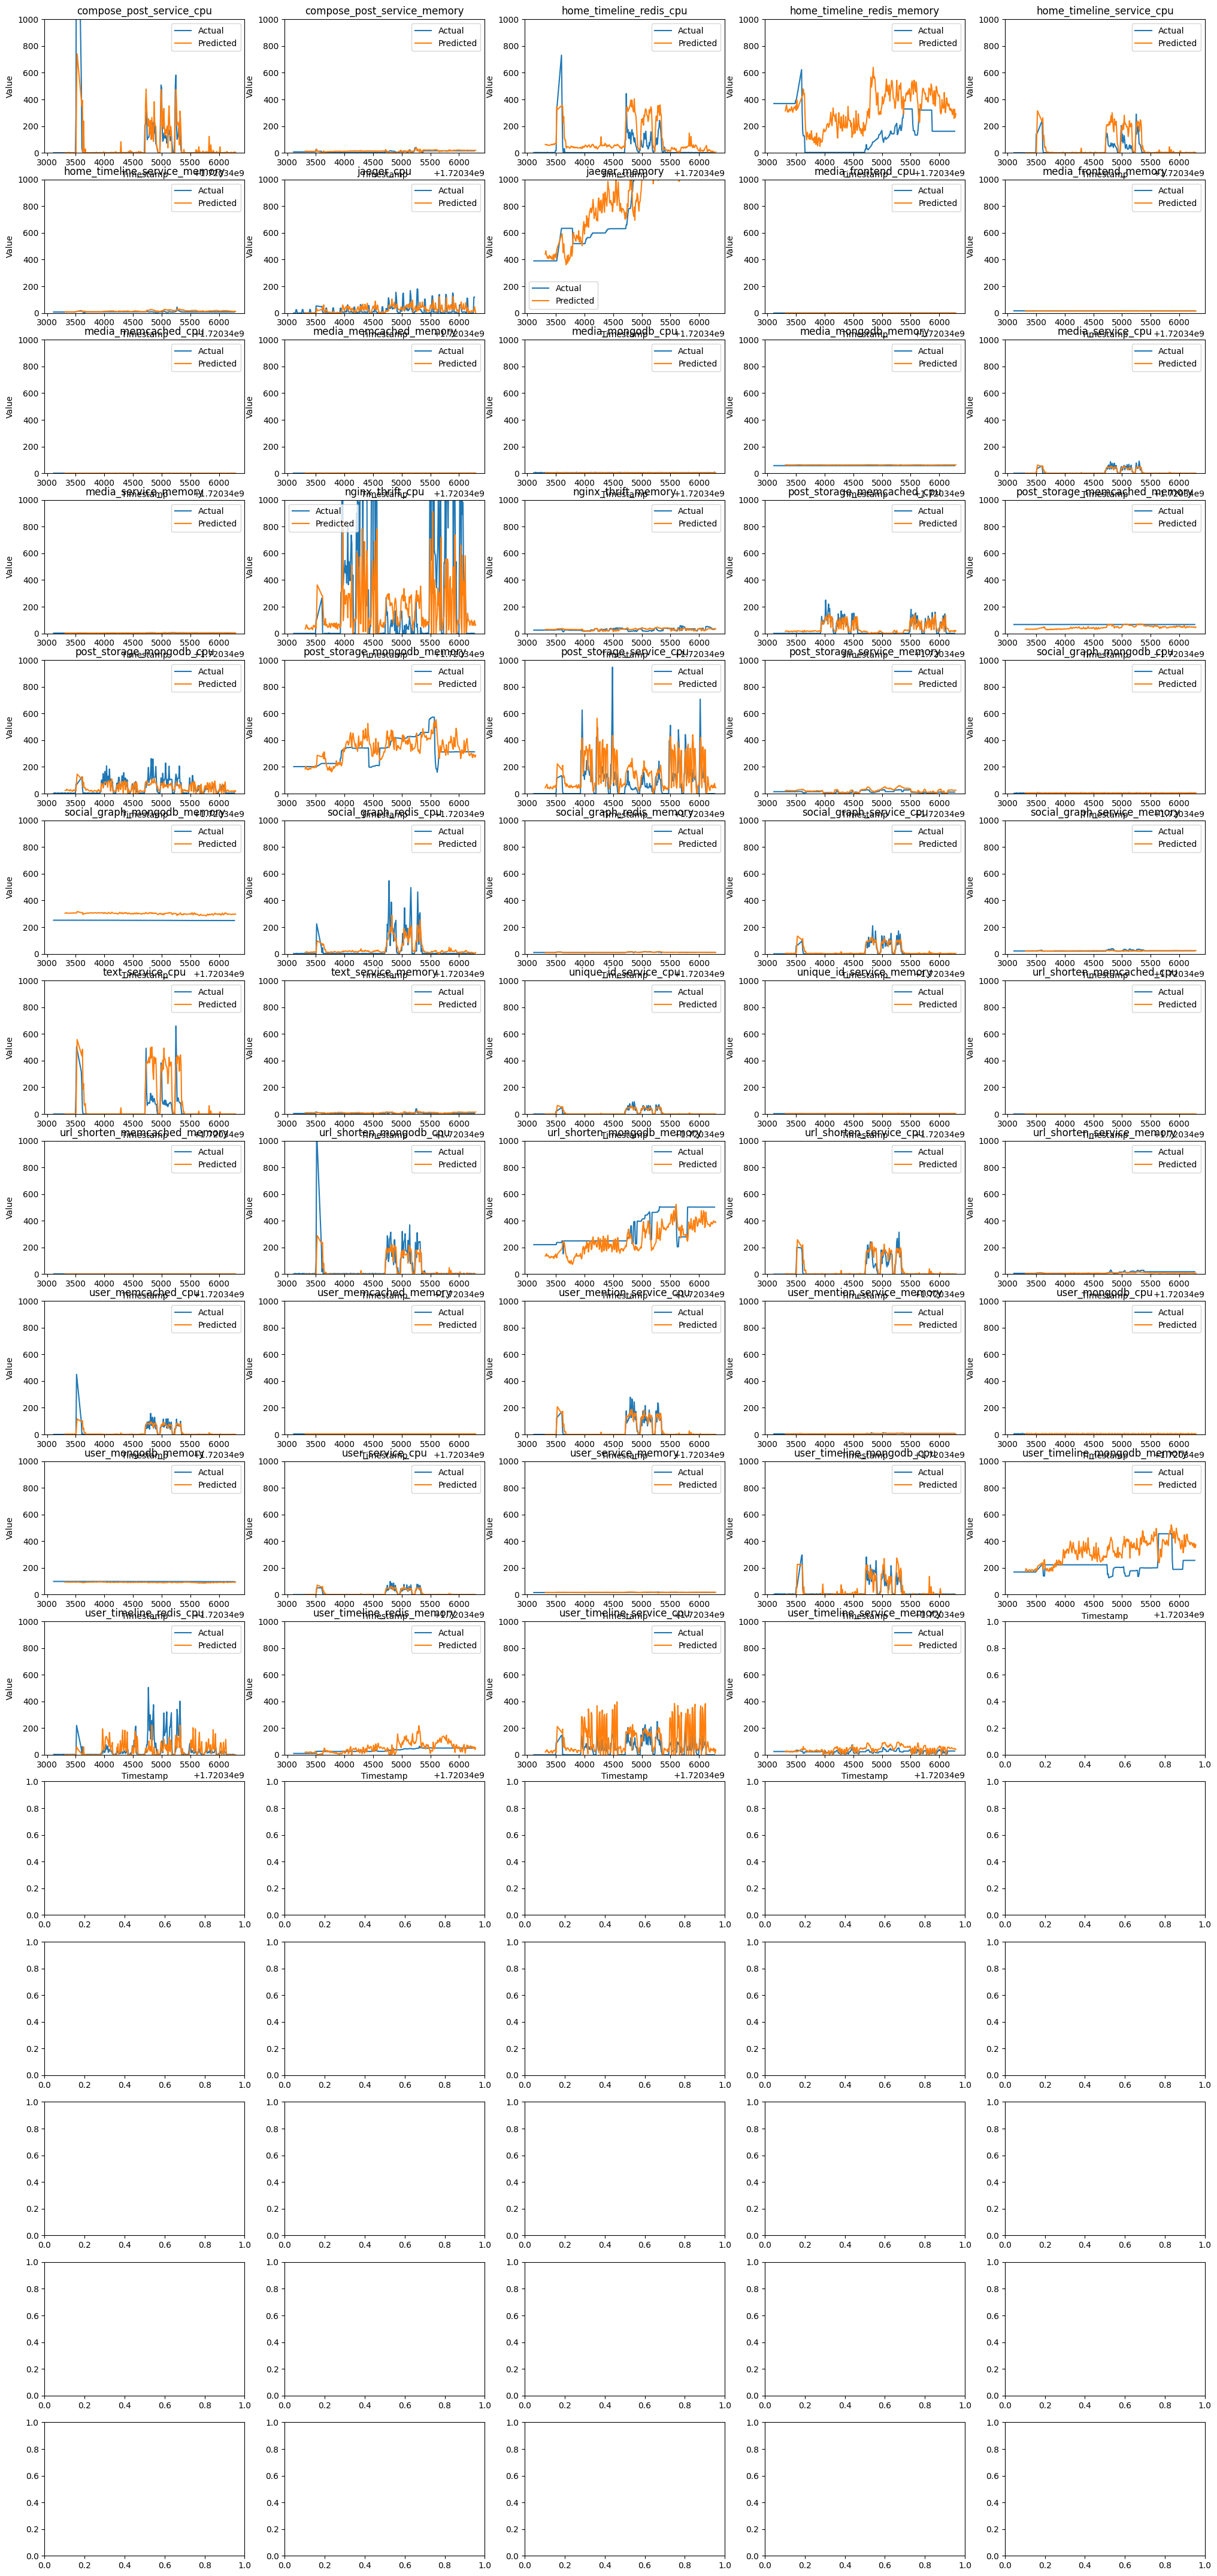

In [41]:
# Plot the data using line plot
import matplotlib.pyplot as plt
# Create 5x5 grid of subplots
fig, axes = plt.subplots(16, 5, figsize=(25, 55))
# Flatten the axes array
axes = axes.flatten()
# Plot each metric
df.drop([col for col in df.columns if col.endswith("_replicas")], axis=1, inplace=True)
for i, metric in enumerate(df.columns[1:][:-1]):
    axes[i].plot(df['timestamp'], df[metric], label='Actual')
    axes[i].plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Value')
    # Set max y-axis limit to 1000
    axes[i].set_ylim(0, 1000)
    axes[i].legend()

In [42]:
fig.savefig(input())

In [9]:
table = "social_network_replicas"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
replicas = cur.fetchall()
replicas_column_names = [desc[0] for desc in cur.description]
cur.close()

In [10]:
# Create a dataframe
replica_df = pd.DataFrame(replicas, columns=replicas_column_names)
replica_df

,id,compose_post_service,home_timeline_redis,home_timeline_service,jaeger,media_frontend,media_memcached,media_mongodb,media_service,nginx_thrift,...,url_shorten_mongodb,url_shorten_service,user_memcached,user_mention_service,user_mongodb,user_service,user_timeline_mongodb,user_timeline_redis,user_timeline_service,timestamp
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784941
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784951
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784961
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784971
4,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1716784981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791303
76,77,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791313
77,78,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791323
78,79,1,5,1,1,1,1,1,1,1,...,2,1,1,1,1,1,5,1,1,1716791333


In [11]:
i = 2
replica_df[replicas_column_names[i]]

0     1
1     1
2     1
3     1
4     1
     ..
75    5
76    5
77    5
78    5
79    5
Name: home_timeline_redis, Length: 80, dtype: int64

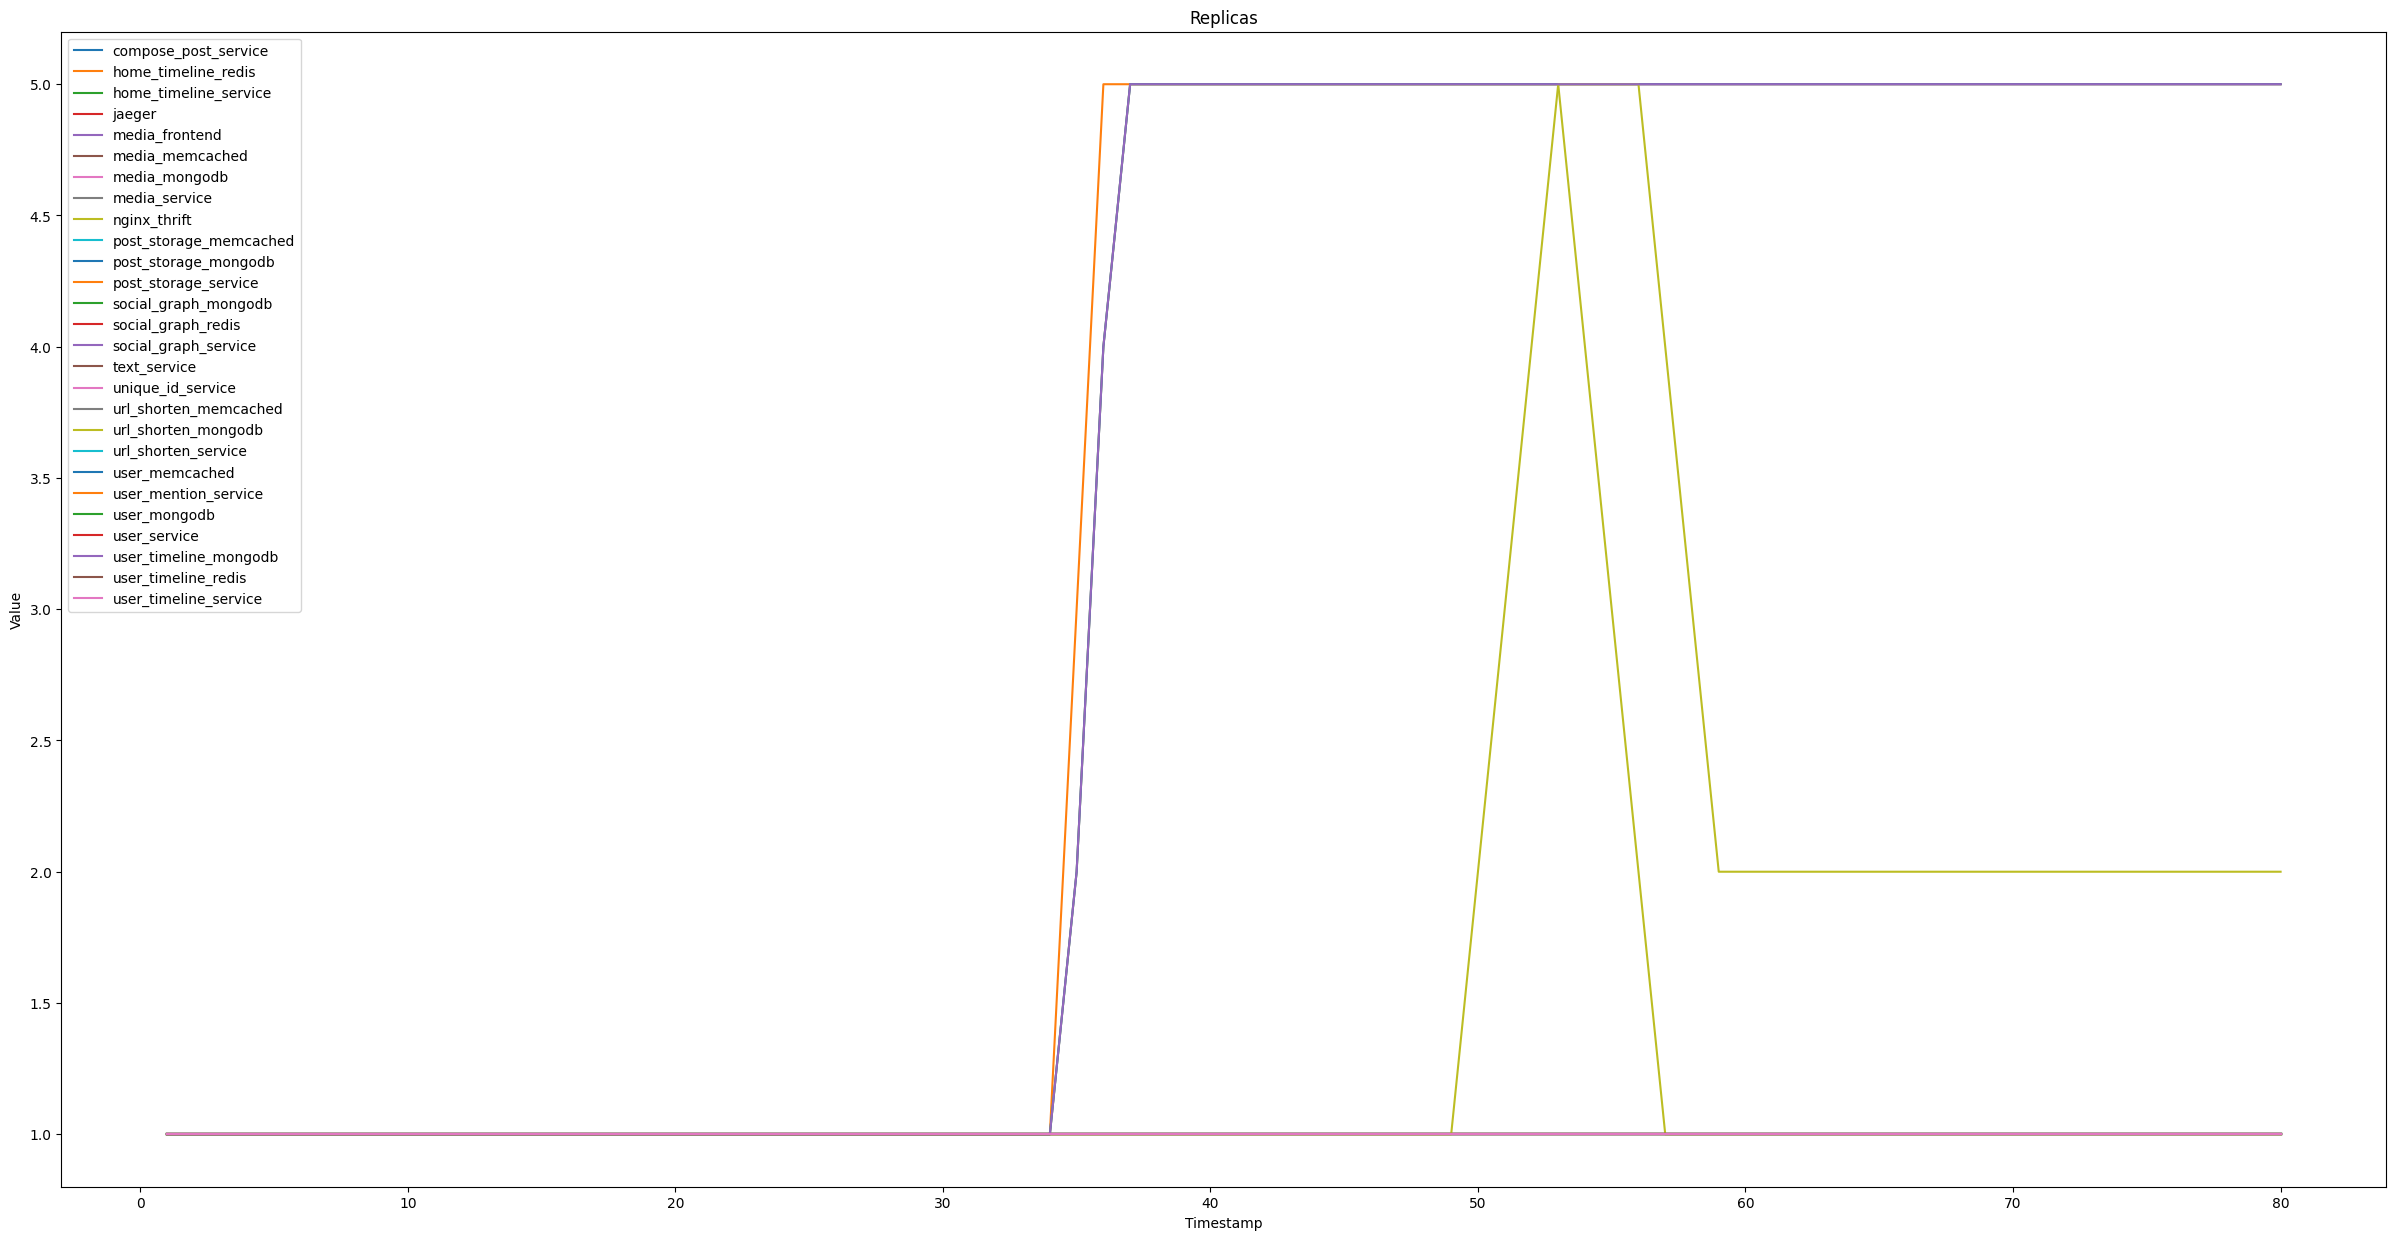

In [12]:
# Plot the data using line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
for replicas_column_name in replicas_column_names[1:]:
    if replicas_column_name == "timestamp":
        continue
    plt.plot(replica_df["id"], replica_df[replicas_column_name], label=replicas_column_name)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Replicas')
plt.legend()
plt.show()


In [24]:
cur.close()